In [1]:
# 25 nm - 1550 nm

import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle as plk
import importlib.util
from numpy.lib.scimath import sqrt as csqrt
from IPython.display import display, Math, clear_output
from scipy.signal import find_peaks
###############################################################
#LINUX PATH

# sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
# import lumapi
# sys.path.append(os.path.dirname('/media/leonardo/datam02/Ring Resonator - Leonardo Pessôa/Ring-Resonator/Tutorial/')) #Current directory

###############################################################
# WINDOWS PATH

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
sys.path.append(os.path.dirname('D:/AAAAAAAArquivos/Facul/Capacitação/GitHub/BraggGrating'))
spec_win.loader.exec_module(lumapi)

def fwhm(band, reflection, dB):
    from scipy.signal import find_peaks
    peak, pd = find_peaks(reflection)
    rmax = reflection[peak[np.argmax(reflection[peak])]]

    min = 0
    max = 0

    if dB == True: 
        dB = 3
        rmax = rmax-dB
    else: 
        dB = 0 
        rmax = rmax/2

    for i in range(peak[np.argmax(reflection[peak])], 0, -1):
        if (reflection[i] <(rmax) and reflection[i+1] < (rmax)):
            min = i
            break

    for i in range(peak[np.argmax(reflection[peak])], len(band) - 1):
        if (reflection[i-1] > (rmax) and reflection[i] < (rmax)):
            max = i
            break

    print('FWHM = '+ str(np.round((band[max]-band[min])*1e9,4)) + 'nm')

    r = (reflection[min] +reflection[max])/2

    
    return r,min,max


C:\Users\lecob\AppData\Local\Temp\ipykernel_7200\346776376.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
band = np.linspace(1500*1e-9, 1600*1e-9, 20000)
Cband = np.linspace(1530*1e-9, 1565*1e-9, 20000)

# Python Theoretical Graphics

Using 0.45µm Width

In [3]:
mode = lumapi.MODE()

In [ ]:
# Getting Neff and Ng
mode.switchtolayout()
mode.deleteall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik'
})
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 15e-6,
    'z span'   : 4e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik'
})
mode.addfde()
mode.set({
    'solver type' : '2D X normal',
    'y'           : 0,
    'y span'      : 7.5e-6,
    'z'           : 0,
    'z span'      : 2e-6,
    'mesh cells y': 400,
    'mesh cells z': 400,
})
mode.run()

In [3]:
# Constants

lambda_B = 1550e-9
pi = np.pi
c0 = 299792458
neff = 2.27
k0 = 2*pi/lambda_B
ng = 4.60
FWHM = 25e-9
beta = k0*neff
gratingPeriod = lambda_B/(2*neff)

C:\Users\lecob\AppData\Local\Temp\ipykernel_4420\3583791069.py:15: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)


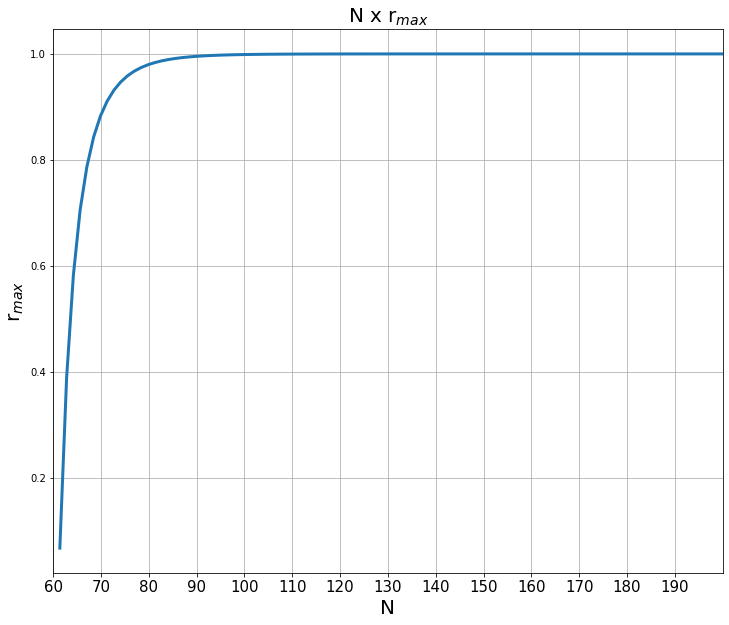

In [8]:
# Getting the Lenght and number of periods
figure1 = plt.figure(figsize=(12, 10))

N = np.linspace(60,200,100)

plt.grid()
plt.title('N x r$_{%s}$' %('max'), size = 20)
plt.ylabel('r$_{%s}$' %('max'), size = '20')
plt.xlabel('N', size = '20')
plt.xlim(N[0], N[-1])
plt.xticks(np.arange(N[0], N[-1], 10), size = '15')


L = gratingPeriod*N
k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)
rmax = (np.tanh(k*L))**2
plt.plot(N, rmax, linewidth = 3)

figure1.savefig('N_x_rmax.png')

In [4]:
N = 120
L = gratingPeriod*N
k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)
rmax = (np.tanh(k*L))**2

deltaNeff_Theory = k*lambda_B/2
print('rmax = ' + str(rmax))
print('L = ' + str(L*1e6) + 'um')
print('delta neff = ' + str(deltaNeff_Theory))
print('Grating Period = ', str(gratingPeriod*1e9), 'nm')

rmax = 0.9999002770406655
L = 40.969162995594715um
delta neff = 0.10025227168694313
Grating Period =  341.40969162995594 nm


In [5]:
mode = lumapi.MODE()

In [6]:
# Getting Neff X DeltaW graph

mode.switchtolayout()
mode.deleteall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 15e-6,
    'z span'   : 4e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addfde()
mode.set({
    'solver type' : '2D X normal',
    'y'           : 0,
    'y span'      : 7.5e-6,
    'z'           : 0,
    'z span'      : 2e-6,
    'mesh cells y': 250,
    'mesh cells z': 250,
})
mode.addmesh()
mode.set({
    'x'      : 0,
    'y'      : 0,
    'z'      : 0,
    'y span' : 7.5e-6,
    'z span' : 2e-6,
    'dx'     : 0.001,
    'dy'     : 0.001,
    'dz'     : 0.001
})

In [13]:
a = 20
deltaW = np.linspace(0,100e-9, a)

neff1 = np.zeros(a)
neff2 = np.zeros(a)

mode.switchtolayout()

#neff1 array
for i in range(a):
    mode.setnamed('waveguide', 'y span', 0.45e-6 + (deltaW[i]))
    mode.run()
    mode.findmodes()
    neff1[i] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()
    clear_output(wait=True)
    print('Neff1 (' + str(i+1)+ '/' + str(a) + ') Done')

#neff2 array
for i in range(a):
    mode.setnamed('waveguide', 'y span', 0.45e-6 - (deltaW[i]))
    mode.run()
    mode.findmodes()
    neff2[i] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()
    clear_output(wait=True)
    print('Neff1 ({}/{}) Done'.format(a,a))
    print('Neff2 (' + str(i+1)+ '/' + str(a) + ') Done')

Neff1 (20/20) Done
Neff2 (20/20) Done


<IPython.core.display.Math object>

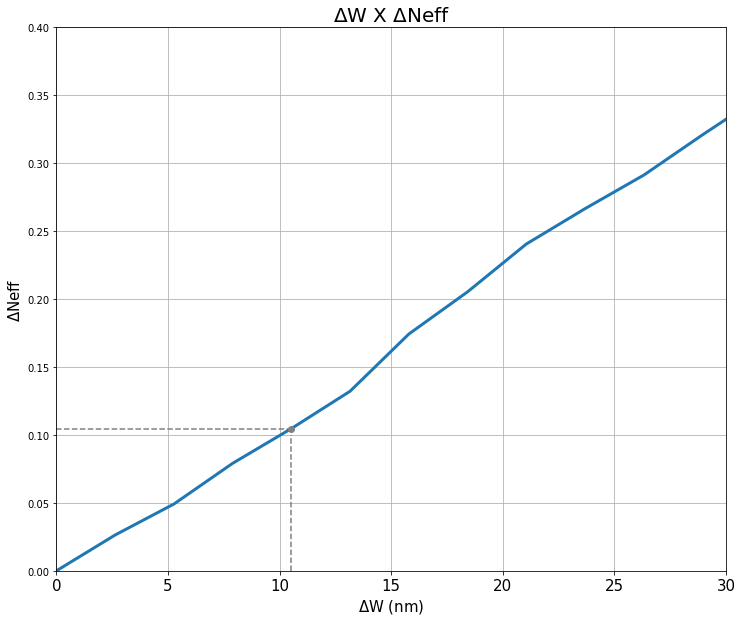

In [14]:
figure2 = plt.figure(figsize=(12, 10))
deltaNeff = neff1 - neff2

for i in range(0,a):
    if (deltaNeff[i-1] <(deltaNeff_Theory) and deltaNeff[i] > (deltaNeff_Theory)):
        value1 = deltaNeff[i]
        value2 = deltaW[i]/2
        break

plt.grid()
plt.title('$\Delta$W X $\Delta$Neff', size = 20)
plt.xlabel('$\Delta$W (nm)', size = '15')
plt.ylabel('$\Delta$Neff', size = '15')
plt.xlim(0,30)
plt.ylim(0,0.4)
plt.axhline(y=value1, xmax = 0.35, linestyle='--', color = 'grey')
plt.axvline(x=value2*1e9, ymax = 0.25, linestyle='--', color = 'grey')
plt.xticks(size = '15')
plt.plot(deltaW*1e9/2, deltaNeff, linewidth = 3)
plt.plot(value2*1e9, value1,'o', color = 'grey')
figure2.savefig('DeltaW_x_DeltaNeff.png')
display(Math('with~\Delta Neff~=~%5.2f~we~have~%5.2f~\Delta W~(nm)' %(value1,value2*1e9)))

In [9]:
mode = lumapi.MODE()

In [10]:
# Simulation on EME

dw = 24e-9
N = 82
gratingPeriod = 344.3777e-9


mode.switchtolayout()
mode.deleteall()

mode.addrect()
mode.set({
    'x min'    : -2e-6,
    'x max'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})

mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod/2,
    'x min'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6 + 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating1'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod,
    'x min'    : gratingPeriod/2,
    'y'        : 0,
    'y span'   : 0.45e-6 - 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : 2e-6,
    'x min'    : 0e-6 + gratingPeriod,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 4e-6,
    'y'        : 0,
    'y span'   : 5e-6,
    'z span'   : 2e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addeme()
mode.set({
    'y' : 0,
    'y span' : 5e-6,
    'z' : 0,
    'z span' : 3e-6,
    'x min'  : -2e-6,
    'display cells': 1,
    'number of cell groups' : 4,
    'number of modes for all cell groups' : 2,
    'cells' : np.transpose([5, 5, 5, 5]),
    'group spans' : np.transpose([2e-6, gratingPeriod/2, gratingPeriod/2, 2e-6-gratingPeriod]),
    'subcell method' : np.transpose([1, 1, 1, 1]),
    'number of periodic groups':3,
    'start cell group' : np.transpose([1, 2, 4]),
    'end cell group' : np.transpose([1, 3, 4]),
    'periods' : np.transpose([1, N, 1]),
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
    'mesh cells y' : 200,
    'mesh cells z' : 200,
    })

In [121]:
mode.run()
mode.emepropagate()
mode.setemeanalysis("wavelength sweep",1)
mode.setemeanalysis("start wavelength",1.5e-6)
mode.setemeanalysis("stop wavelength",1.6e-6)
mode.setemeanalysis("number of wavelength points",5000)
mode.emesweep("wavelength sweep")

In [124]:
Sweep = mode.getemesweep("S_wavelength_sweep")
wavelength = Sweep['wavelength']
S = (abs(Sweep['s11'])**2)

FWHM = [25.025]nm


<IPython.core.display.Math object>

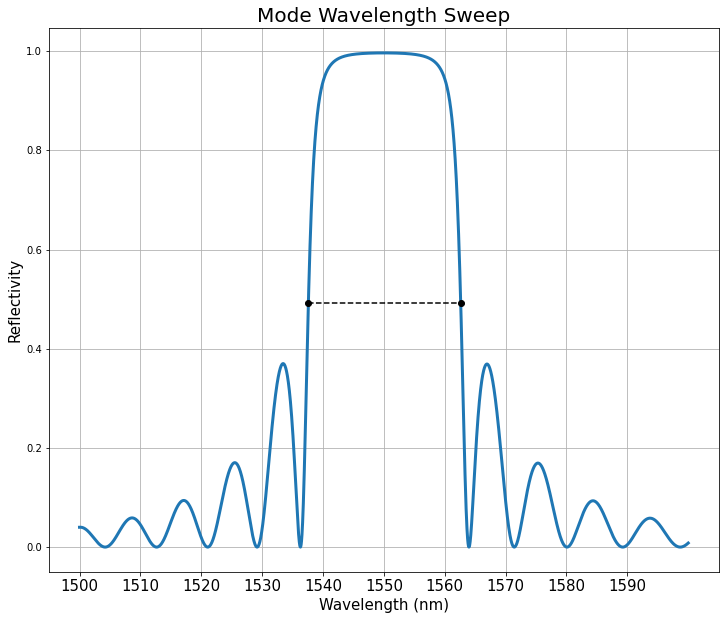

In [132]:
figure3 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, S, linewidth = 3)
plt.grid()
#plt.xlim(1500,1600)
#plt.ylim(0,1.05)
plt.title('Mode Wavelength Sweep', size = 20)
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity', size = '15')
r, min, max = fwhm(wavelength, S, False)
plt.plot(wavelength[min]*1e9, r, 'o',color='black')
plt.plot(wavelength[max]*1e9, r, 'o',color='black')
plt.plot([wavelength[min]*1e9,wavelength[max]*1e9],[r, r],linestyle='--', color = 'black')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep')

peak, pd = find_peaks(S)
display(Math('$\Lambda_B = %5.2f nm' %(wavelength[peak[np.argmax(S[peak])]][0]*1e9)))

FWHM = [25.025]nm


<IPython.core.display.Math object>

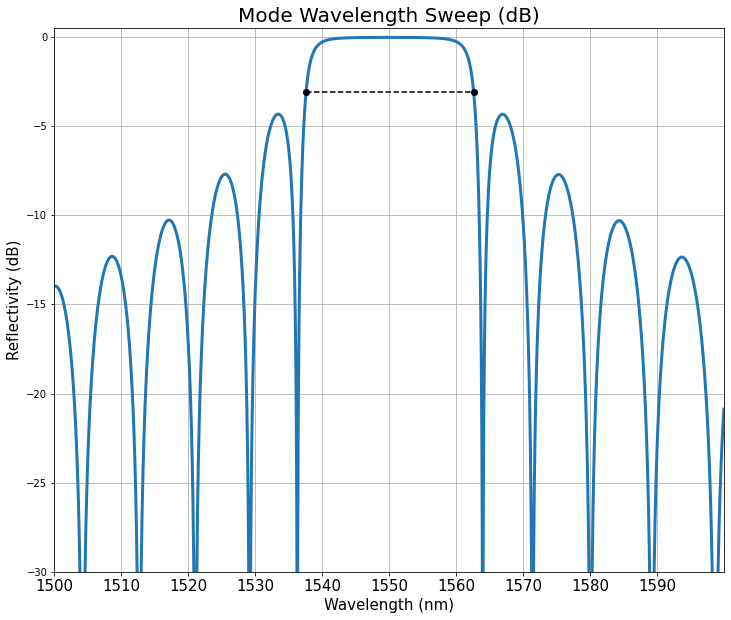

In [134]:
figure4 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, 10*np.log10(S), linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(-30,0.5)
plt.title('Mode Wavelength Sweep (dB)', size = 20)
r, min, max = fwhm(wavelength, 10*np.log10(S), True)
plt.plot(wavelength[min]*1e9, r, 'o',color='black')
plt.plot(wavelength[max]*1e9, r, 'o',color='black')
plt.plot([wavelength[min]*1e9,wavelength[max]*1e9],[r, r],linestyle='--', color = 'black')
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity (dB)', size = '15')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep_dB')
display(Math('$\Lambda_B = %5.2f nm' %(wavelength[peak[np.argmax(S[peak])]][0]*1e9)))

In [6]:
dw = 24e-9
N = 82

period = [0.9,1,1.1]
peaks = np.zeros(len(period))

for i in range(len(period)):
    # Simulation on EME

    mode.switchtolayout()
    mode.deleteall()

    mode.addrect()
    mode.set({
        'x min'    : -2e-6,
        'x max'    : 0,
        'y'        : 0,
        'y span'   : 0.45e-6,
        'z'        : 0.11e-6,
        'z span'   : 0.22e-6,
        'material' : 'Si (Silicon) - Palik',
        'name'     : 'waveguide'
    })

    mode.unselectall()
    mode.addrect()
    mode.set({
        'x max'    : gratingPeriod*period[i]/2,
        'x min'    : 0,
        'y'        : 0,
        'y span'   : 0.45e-6 + 2*dw,
        'z'        : 0.11e-6,
        'z span'   : 0.22e-6,
        'material' : 'Si (Silicon) - Palik',
        'name'     : 'grating1'
    })
    mode.unselectall()
    mode.addrect()
    mode.set({
        'x max'    : gratingPeriod*period[i],
        'x min'    : gratingPeriod*period[i]/2,
        'y'        : 0,
        'y span'   : 0.45e-6 - 2*dw,
        'z'        : 0.11e-6,
        'z span'   : 0.22e-6,
        'material' : 'Si (Silicon) - Palik',
        'name'     : 'grating2'
    })
    mode.unselectall()
    mode.addrect()
    mode.set({
        'x max'    : 2e-6,
        'x min'    : 0e-6 + gratingPeriod*period[i],
        'y'        : 0,
        'y span'   : 0.45e-6,
        'z'        : 0.11e-6,
        'z span'   : 0.22e-6,
        'material' : 'Si (Silicon) - Palik',
        'name'     : 'waveguide2'
    })
    mode.unselectall()
    mode.addrect()
    mode.set({
        'x'        : 0,
        'x span'   : 4e-6,
        'y'        : 0,
        'y span'   : 5e-6,
        'z span'   : 2e-6,
        'z max'    : 0e-6,
        'material' : 'SiO2 (Glass) - Palik',
        'name'     : 'substract'
    })
    mode.addeme()
    mode.set({
        'y' : 0,
        'y span' : 5e-6,
        'z' : 0,
        'z span' : 3e-6,
        'x min'  : -2e-6,
        'display cells': 1,
        'number of cell groups' : 4,
        'number of modes for all cell groups' : 2,
        'cells' : np.transpose([5, 5, 5, 5]),
        'group spans' : np.transpose([2e-6, gratingPeriod*period[i]/2, gratingPeriod*period[i]/2, 2e-6-gratingPeriod*period[i]]),
        'subcell method' : np.transpose([1, 1, 1, 1]),
        'number of periodic groups':3,
        'start cell group' : np.transpose([1, 2, 4]),
        'end cell group' : np.transpose([1, 3, 4]),
        'periods' : np.transpose([1, N, 1]),
        'y min bc' : 'PML',
        'y max bc' : 'PML',
        'z min bc' : 'PML',
        'z max bc' : 'PML',
        'mesh cells y' : 200,
        'mesh cells z' : 200,
        })
    mode.run()
    mode.emepropagate()
    mode.setemeanalysis("wavelength sweep",1)
    mode.setemeanalysis("start wavelength",1.5e-6)
    mode.setemeanalysis("stop wavelength",1.6e-6)
    mode.setemeanalysis("number of wavelength points",5000)
    mode.emesweep("wavelength sweep")

    Sweep = mode.getemesweep("S_wavelength_sweep")
    wavelength = Sweep['wavelength']
    S = (abs(Sweep['s22'])**2)

    
    peak, pd = find_peaks(S)
    cbragg = wavelength[peak[np.argmax(S[peak])]]
    peaks[i] = cbragg


NameError: name 'mode' is not defined

C:\Users\lecob\AppData\Local\Temp\ipykernel_7200\2069675229.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  print((1.55e-6 - b)/a*1e9)


inf


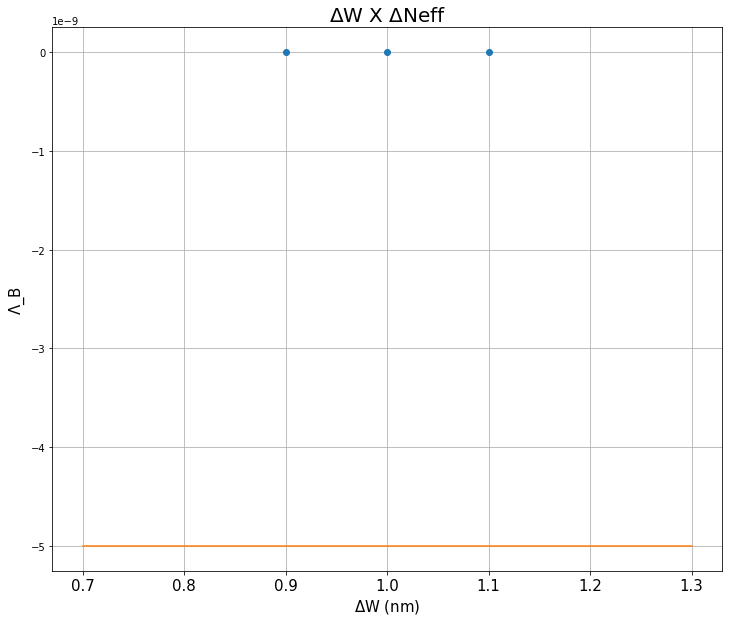

In [7]:
figure5 = plt.figure(figsize=(12, 10))

period = period
plt.plot(period,peaks,'o')
a = (peaks[-1]-peaks[0])/(period[-1]-period[0])
b = peaks[0] -a*period[0]
b = b - 0.005e-6

p = np.linspace(0.7,1.3,100)
f = b + np.multiply(p,a)
plt.plot(p,f)
print((1.55e-6 - b)/a*1e9)
plt.grid()
plt.title('$\Delta$W X $\Delta$Neff', size = 20)
plt.xlabel('$\Delta$W (nm)', size = '15')
plt.ylabel('$\Lambda$_B', size = '15')
#plt.xlim(1500e-9, 1600e-9)
#plt.ylim(0,0.4)
plt.xticks(size = '15')
figure5.savefig('DeltaW_x_DeltaNeff.png')

In [ ]:
# diferent N values Test (2*N)

N2 = 2*N

# Simulation on EME

dw = 10.53e-9

mode.switchtolayout()
mode.deleteall()

mode.addrect()
mode.set({
    'x min'    : -2e-6,
    'x max'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})

mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod/2,
    'x min'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6 + 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating1'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod,
    'x min'    : gratingPeriod/2,
    'y'        : 0,
    'y span'   : 0.45e-6 - 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : 2e-6,
    'x min'    : 0e-6 + gratingPeriod,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 4e-6,
    'y'        : 0,
    'y span'   : 5e-6,
    'z span'   : 2e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addeme()
mode.set({
    'y' : 0,
    'y span' : 5e-6,
    'z' : 0,
    'z span' : 3e-6,
    'x min'  : -2e-6,
    'display cells': 1,
    'number of cell groups' : 4,
    'number of modes for all cell groups' : 2,
    'cells' : np.transpose([5, 5, 5, 5]),
    'group spans' : np.transpose([2e-6, gratingPeriod/2, gratingPeriod/2, 2e-6-gratingPeriod]),
    'subcell method' : np.transpose([1, 1, 1, 1]),
    'number of periodic groups':3,
    'start cell group' : np.transpose([1, 2, 4]),
    'end cell group' : np.transpose([1, 3, 4]),
    'periods' : np.transpose([1, N2, 1]),
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
    'mesh cells y' : 200,
    'mesh cells z' : 200,
    })

In [33]:
mode.run()
mode.emepropagate()
mode.setemeanalysis("wavelength sweep",1)
mode.setemeanalysis("start wavelength",1.5e-6)
mode.setemeanalysis("stop wavelength",1.6e-6)
mode.setemeanalysis("number of wavelength points",5000)
mode.emesweep("wavelength sweep")
Sweep = mode.getemesweep("S_wavelength_sweep")
wavelength = Sweep['wavelength']
S22 = (abs(Sweep['s22'])**2)

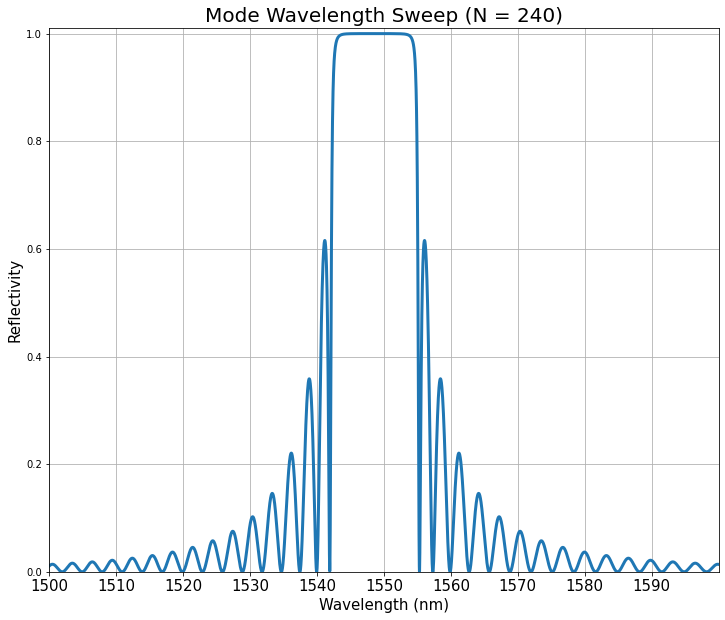

In [34]:
figure4 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, S22, linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(0,1.01)
plt.title('Mode Wavelength Sweep (N = 240)', size = 20)
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity', size = '15')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep_N=240')

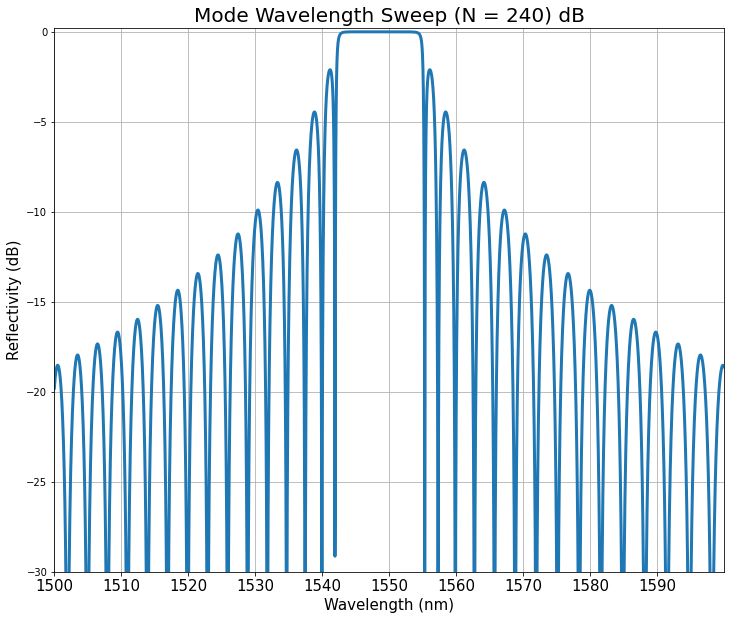

In [35]:
figure5 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, 10*np.log10(S22), linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(-30,0.2)
plt.title('Mode Wavelength Sweep (N = 240) dB', size = 20)
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity (dB)', size = '15')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep_N=240_dB')

In [8]:
# diferent N values Test (N = 500)

N2 = 1000

# Simulation on EME

dw = 10.53e-9

mode.switchtolayout()
mode.deleteall()

mode.addrect()
mode.set({
    'x min'    : -2e-6,
    'x max'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})

mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod/2,
    'x min'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6 + 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating1'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod,
    'x min'    : gratingPeriod/2,
    'y'        : 0,
    'y span'   : 0.45e-6 - 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : 2e-6,
    'x min'    : 0e-6 + gratingPeriod,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 4e-6,
    'y'        : 0,
    'y span'   : 5e-6,
    'z span'   : 2e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addeme()
mode.set({
    'y' : 0,
    'y span' : 5e-6,
    'z' : 0,
    'z span' : 3e-6,
    'x min'  : -2e-6,
    'display cells': 1,
    'number of cell groups' : 4,
    'number of modes for all cell groups' : 2,
    'cells' : np.transpose([5, 5, 5, 5]),
    'group spans' : np.transpose([2e-6, gratingPeriod/2, gratingPeriod/2, 2e-6-gratingPeriod]),
    'subcell method' : np.transpose([1, 1, 1, 1]),
    'number of periodic groups':3,
    'start cell group' : np.transpose([1, 2, 4]),
    'end cell group' : np.transpose([1, 3, 4]),
    'periods' : np.transpose([1, N2, 1]),
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
    'mesh cells y' : 200,
    'mesh cells z' : 200,
    })

In [ ]:
mode.run()
mode.emepropagate()
mode.setemeanalysis("wavelength sweep",1)
mode.setemeanalysis("start wavelength",1.5e-6)
mode.setemeanalysis("stop wavelength",1.6e-6)
mode.setemeanalysis("number of wavelength points",5000)
mode.emesweep("wavelength sweep")

In [10]:
Sweep = mode.getemesweep("S_wavelength_sweep")
wavelength = Sweep['wavelength']
S22 = (abs(Sweep['s22'])**2)

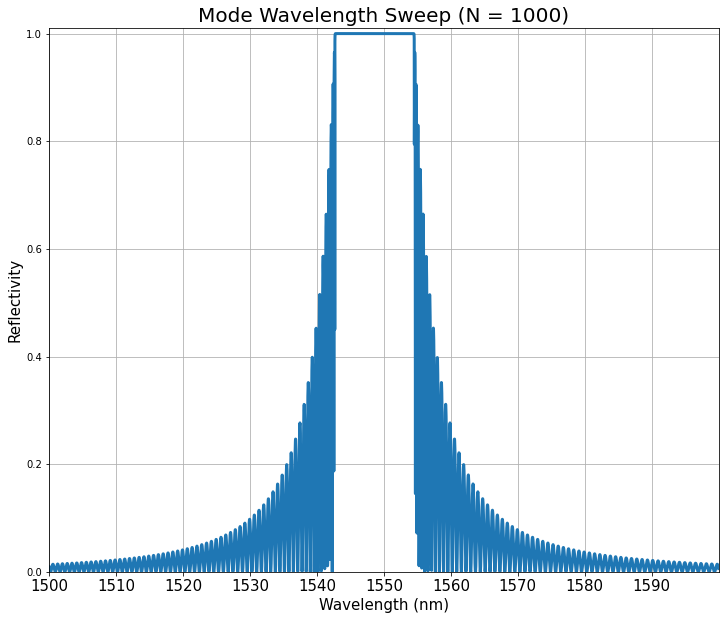

In [15]:
figure5 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, S22, linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(0,1.01)
plt.title('Mode Wavelength Sweep (N = 1000)', size = 20)
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity', size = '15')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep_N=1000')

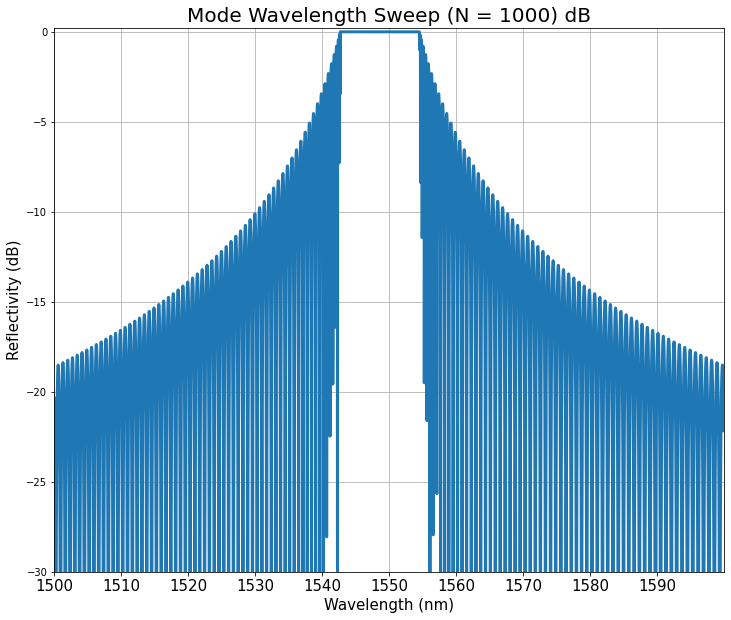

In [16]:
figure6 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, 10*np.log10(S22), linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(-30,0.2)
plt.title('Mode Wavelength Sweep (N = 1000) dB', size = 20)
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity (dB)', size = '15')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep_N=1000_dB')

Using 0.60µm Width

In [4]:
# Getting Neff and Ng
mode.switchtolayout()
mode.deleteall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 0.6e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik'
})
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 15e-6,
    'z span'   : 4e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik'
})
mode.addfde()
mode.set({
    'solver type' : '2D X normal',
    'y'           : 0,
    'y span'      : 7.5e-6,
    'z'           : 0,
    'z span'      : 2e-6,
    'mesh cells y': 400,
    'mesh cells z': 400,
})
mode.run()

{!!}



C:\Program Files\Lumerical\v202\api\python\lumapi.py:138: UserWarning: Multiple objects named '::model::rectangle'. Use of this object may give unexpected results.
  warnings.warn(message)


In [5]:
# Constants

lambda_B = 1550e-9
pi = np.pi
c0 = 299792458
neff = 2.53
k0 = 2*pi/lambda_B
ng = 4.20
FWHM = 25e-9
beta = k0*neff
gratingPeriod = lambda_B/(2*neff)

C:\Users\lecob\AppData\Local\Temp\ipykernel_19780\2839821064.py:15: RuntimeWarning: invalid value encountered in sqrt
  k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)


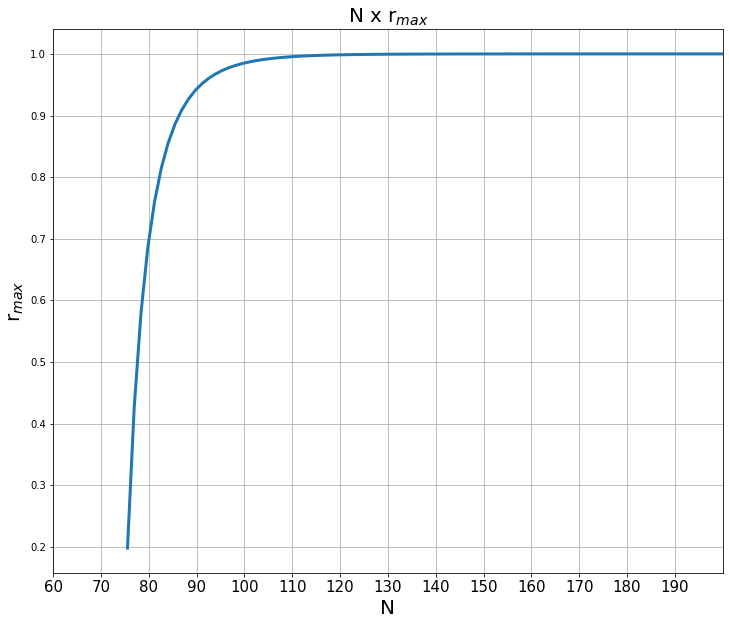

In [6]:
# Getting the Lenght and number of periods
figure7 = plt.figure(figsize=(12, 10))

N = np.linspace(60,200,100)

plt.grid()
plt.title('N x r$_{%s}$' %('max'), size = 20)
plt.ylabel('r$_{%s}$' %('max'), size = '20')
plt.xlabel('N', size = '20')
plt.xlim(N[0], N[-1])
plt.xticks(np.arange(N[0], N[-1], 10), size = '15')


L = gratingPeriod*N
k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)
rmax = (np.tanh(k*L))**2
plt.plot(N, rmax, linewidth = 3)

figure7.savefig('N_x_rmax(0.6um).png')

In [7]:
N = 120
L = gratingPeriod*N
k = np.sqrt((FWHM*np.pi*ng/lambda_B**2)**2 - (pi/L)**2)
rmax = (np.tanh(k*L))**2

deltaNeff_Theory = k*lambda_B/2
print('rmax = ' + str(rmax))
print('L = ' + str(L*1e6) + 'um')
print('delta neff = ' + str(deltaNeff_Theory))
print('Grating Period = ', str(gratingPeriod*1e9), 'nm')

rmax = 0.998518379415019
L = 36.75889328063241um
delta neff = 0.08328097919352377
Grating Period =  306.32411067193675 nm


In [9]:
# Getting Neff X DeltaW graph

mode.switchtolayout()
mode.deleteall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 0.6e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 10e-6,
    'y'        : 0,
    'y span'   : 15e-6,
    'z span'   : 4e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addfde()
mode.set({
    'solver type' : '2D X normal',
    'y'           : 0,
    'y span'      : 7.5e-6,
    'z'           : 0,
    'z span'      : 2e-6,
    'mesh cells y': 250,
    'mesh cells z': 250,
})
mode.addmesh()
mode.set({
    'x'      : 0,
    'y'      : 0,
    'z'      : 0,
    'y span' : 7.5e-6,
    'z span' : 2e-6,
    'dx'     : 0.001,
    'dy'     : 0.001,
    'dz'     : 0.001
})

In [10]:
a = 20
deltaW = np.linspace(0,100e-9, a)

neff1 = np.zeros(a)
neff2 = np.zeros(a)

mode.switchtolayout()

#neff1 array
for i in range(a):
    mode.setnamed('waveguide', 'y span', 0.6e-6 + (deltaW[i]))
    mode.run()
    mode.findmodes()
    neff1[i] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()
    clear_output(wait=True)
    print('Neff1 (' + str(i+1)+ '/' + str(a) + ') Done')

#neff2 array
for i in range(a):
    mode.setnamed('waveguide', 'y span', 0.6e-6 - (deltaW[i]))
    mode.run()
    mode.findmodes()
    neff2[i] = np.real(mode.getdata('FDE::data::mode1','neff'))
    mode.switchtolayout()
    clear_output(wait=True)
    print('Neff1 ({}/{}) Done'.format(a,a))
    print('Neff2 (' + str(i+1)+ '/' + str(a) + ') Done')

Neff1 (20/20) Done
Neff2 (20/20) Done


<IPython.core.display.Math object>

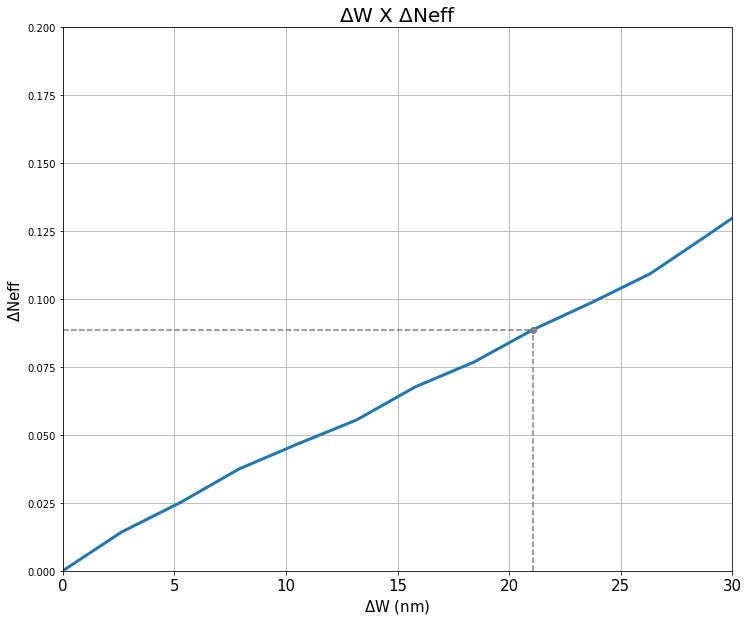

In [15]:
figure8 = plt.figure(figsize=(12, 10))
deltaNeff = neff1 - neff2

for i in range(0,a):
    if (deltaNeff[i-1] <(deltaNeff_Theory) and deltaNeff[i] > (deltaNeff_Theory)):
        value1 = deltaNeff[i]
        value2 = deltaW[i]/2
        break

plt.grid()
plt.title('$\Delta$W X $\Delta$Neff', size = 20)
plt.xlabel('$\Delta$W (nm)', size = '15')
plt.ylabel('$\Delta$Neff', size = '15')
plt.xlim(0,30)
plt.ylim(0,0.2)
plt.axhline(y=value1, xmax = 0.7, linestyle='--', color = 'grey')
plt.axvline(x=value2*1e9, ymax = 0.45, linestyle='--', color = 'grey')
plt.xticks(size = '15')
plt.plot(deltaW*1e9/2, deltaNeff, linewidth = 3)
plt.plot(value2*1e9, value1,'o', color = 'grey')
figure8.savefig('DeltaW_x_DeltaNeff(0.6um).png')
display(Math('with~\Delta Neff~=~%5.2f~we~have~%5.2f~\Delta W~(nm)' %(value1,value2*1e9)))

In [26]:
# Simulation on EME

dw = 21.05e-9/2

mode.switchtolayout()
mode.deleteall()

mode.addrect()
mode.set({
    'x min'    : -2e-6,
    'x max'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})

mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod/2,
    'x min'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6 + 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating1'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod,
    'x min'    : gratingPeriod/2,
    'y'        : 0,
    'y span'   : 0.45e-6 - 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : 2e-6,
    'x min'    : 0e-6 + gratingPeriod,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 4e-6,
    'y'        : 0,
    'y span'   : 5e-6,
    'z span'   : 2e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addeme()
mode.set({
    'y' : 0,
    'y span' : 5e-6,
    'z' : 0,
    'z span' : 3e-6,
    'x min'  : -2e-6,
    'display cells': 1,
    'number of cell groups' : 4,
    'number of modes for all cell groups' : 2,
    'cells' : np.transpose([5, 5, 5, 5]),
    'group spans' : np.transpose([2e-6, gratingPeriod/2, gratingPeriod/2, 2e-6-gratingPeriod]),
    'subcell method' : np.transpose([1, 1, 1, 1]),
    'number of periodic groups':3,
    'start cell group' : np.transpose([1, 2, 4]),
    'end cell group' : np.transpose([1, 3, 4]),
    'periods' : np.transpose([1, N, 1]),
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
    'mesh cells y' : 200,
    'mesh cells z' : 200,
    })

In [30]:
mode.run()
mode.emepropagate()
mode.setemeanalysis("wavelength sweep",1)
mode.setemeanalysis("start wavelength",1.5e-6)
mode.setemeanalysis("stop wavelength",1.6e-6)
mode.setemeanalysis("number of wavelength points",5000)
mode.emesweep("wavelength sweep")

In [31]:
Sweep = mode.getemesweep("S_wavelength_sweep")
wavelength = Sweep['wavelength']
S22 = (abs(Sweep['s22'])**2)

FWHM = [18.1636]nm


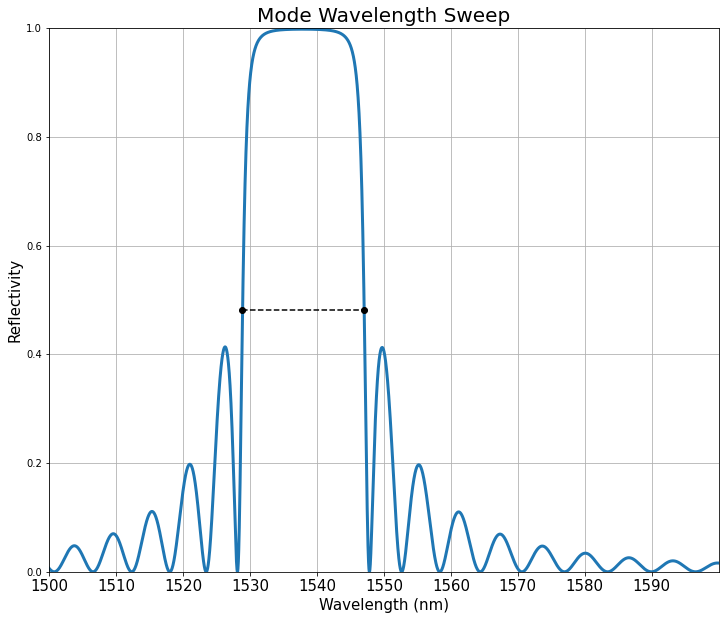

In [114]:
figure9 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, S22, linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(0,1)
plt.title('Mode Wavelength Sweep', size = 20)
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity', size = '15')

r, min, max = fwhm(wavelength, S22, False)
plt.plot(wavelength[min]*1e9, r, 'o',color='black')
plt.plot(wavelength[max]*1e9, r, 'o',color='black')
plt.plot([wavelength[min]*1e9,wavelength[max]*1e9],[r, r],linestyle='--', color = 'black')

plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep(0.6um).png')

FWHM = [-2.8806]nm


ValueError: Format '6um)' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

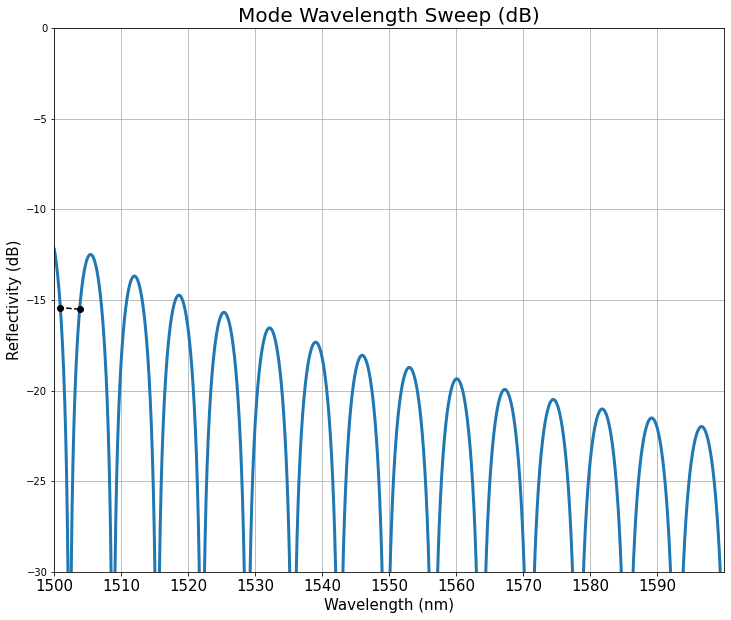

In [20]:
figure10 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, 10*np.log10(S22), linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(-30,0)
plt.title('Mode Wavelength Sweep (dB)', size = 20)
dots, min, max = fwhm(wavelength, 10*np.log10(S22), True)
plt.plot([dots[0],dots[2]],[dots[1],dots[3]],'--',color = 'black')
plt.plot(dots[0],dots[1],'o',color='black')
plt.plot(dots[2],dots[3],'o',color='black')
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity (dB)', size = '15')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep_dB(0.6um)')

In [ ]:
# diferent N values Test (2*N)

N2 = 2*N

# Simulation on EME

dw = 10.53e-9

mode.switchtolayout()
mode.deleteall()

mode.addrect()
mode.set({
    'x min'    : -2e-6,
    'x max'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide'
})

mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod/2,
    'x min'    : 0,
    'y'        : 0,
    'y span'   : 0.45e-6 + 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating1'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : gratingPeriod,
    'x min'    : gratingPeriod/2,
    'y'        : 0,
    'y span'   : 0.45e-6 - 2*dw,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'grating2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x max'    : 2e-6,
    'x min'    : 0e-6 + gratingPeriod,
    'y'        : 0,
    'y span'   : 0.45e-6,
    'z'        : 0.11e-6,
    'z span'   : 0.22e-6,
    'material' : 'Si (Silicon) - Palik',
    'name'     : 'waveguide2'
})
mode.unselectall()
mode.addrect()
mode.set({
    'x'        : 0,
    'x span'   : 4e-6,
    'y'        : 0,
    'y span'   : 5e-6,
    'z span'   : 2e-6,
    'z max'    : 0e-6,
    'material' : 'SiO2 (Glass) - Palik',
    'name'     : 'substract'
})
mode.addeme()
mode.set({
    'y' : 0,
    'y span' : 5e-6,
    'z' : 0,
    'z span' : 3e-6,
    'x min'  : -2e-6,
    'display cells': 1,
    'number of cell groups' : 4,
    'number of modes for all cell groups' : 2,
    'cells' : np.transpose([5, 5, 5, 5]),
    'group spans' : np.transpose([2e-6, gratingPeriod/2, gratingPeriod/2, 2e-6-gratingPeriod]),
    'subcell method' : np.transpose([1, 1, 1, 1]),
    'number of periodic groups':3,
    'start cell group' : np.transpose([1, 2, 4]),
    'end cell group' : np.transpose([1, 3, 4]),
    'periods' : np.transpose([1, N2, 1]),
    'y min bc' : 'PML',
    'y max bc' : 'PML',
    'z min bc' : 'PML',
    'z max bc' : 'PML',
    'mesh cells y' : 200,
    'mesh cells z' : 200,
    })

In [ ]:
mode.run()
mode.emepropagate()
mode.setemeanalysis("wavelength sweep",1)
mode.setemeanalysis("start wavelength",1.5e-6)
mode.setemeanalysis("stop wavelength",1.6e-6)
mode.setemeanalysis("number of wavelength points",5000)
mode.emesweep("wavelength sweep")

In [ ]:
Sweep = mode.getemesweep("S_wavelength_sweep")
wavelength = Sweep['wavelength']
S22 = (abs(Sweep['s22'])**2)

In [ ]:
figure9 = plt.figure(figsize=(12,10))
plt.plot(wavelength*1e9, S22, linewidth = 3)
plt.grid()
plt.xlim(1500,1600)
plt.ylim(0,1)
plt.title('Mode Wavelength Sweep', size = 20)
plt.xlabel('Wavelength (nm)', size = '15')
plt.ylabel('Reflectivity', size = '15')
dots, min, max = fwhm(wavelength, S22, False)
plt.plot(dots[0],dots[1],'o',color='black')
plt.plot(dots[2],dots[3],'o',color='black')
plt.plot([dots[0],dots[2]],[dots[1],dots[3]],'--',color = 'black')
plt.xticks(np.arange(1500,1600,step=10), size = '15')
plt.savefig('Interconnect_Wavelength_Sweep(0.6um)')